In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(5 and 10)

10


In [3]:
print ( 10 and 5)

5


In [4]:
2+3*2

8

In [5]:
("THIOJASIEUkeruwiouIUTI".lower())

'thiojasieukeruwiouiuti'

In [6]:
print(4%3)

1


In [7]:
print(4%4)

0


In [9]:
result = np.int64(4/2)
print(result)

2


In [11]:
arr = np.array([1,23,2,45,3,3,43])
np.average(arr)
np.absolute(arr)

array([ 1, 23,  2, 45,  3,  3, 43])

In [12]:
arr.dtype

dtype('int64')

In [13]:
print(round(2.6554435))

3


In [14]:
print(round(54.69))

55


In [19]:
df = pd.read_csv("/Users/thomassimmons/c/ds/titanic.csv")

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [24]:
df['Age'] = df['Age'].astype('int64')

In [25]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [26]:
df['Cabin'].isnull().sum()

687

In [27]:
df.drop(columns=['Embarked'], inplace=True)

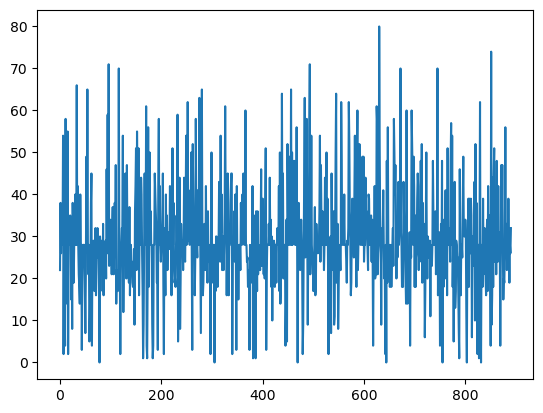

In [28]:
plt.plot(df['Age'])

In [29]:
df.groupby('Age')['Survived'].mean()

Age
0     1.000000
1     0.714286
2     0.300000
3     0.833333
4     0.700000
        ...   
66    0.000000
70    0.000000
71    0.000000
74    0.000000
80    1.000000
Name: Survived, Length: 71, dtype: float64

In [30]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [31]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [32]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

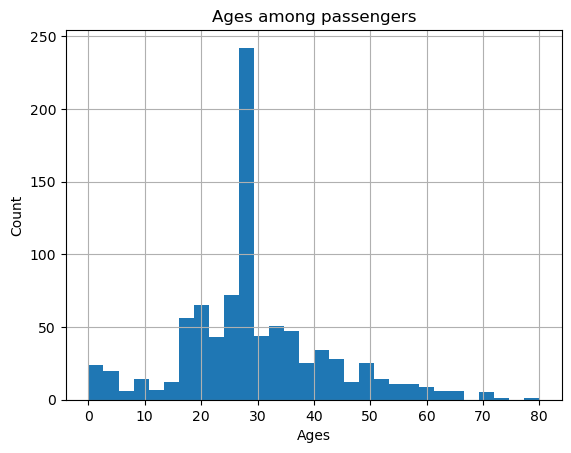

In [35]:
df['Age'].hist(bins=30)
plt.title("Ages among passengers")
plt.xlabel("Ages")
plt.ylabel("Count")
plt.show()

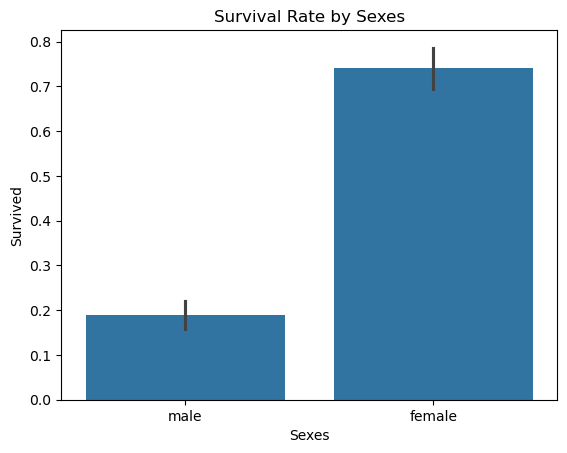

In [36]:
sns.barplot(x = "Sex", y = "Survived", data=df)
plt.xlabel("Sexes")
plt.ylabel("Survived")
plt.title("Survival Rate by Sexes")
plt.show()

In [37]:
conn = sqlite3.connect(":memory:")

In [38]:
conn

In [39]:
cursor = conn.cursor()

In [41]:
df.to_sql('titanic', conn, index = False, if_exists = 'replace')

891

In [42]:
cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table';")
tables = cursor.fetchall()
print(tables)

[('titanic',)]


In [44]:
cursor.execute("PRAGMA table_info (titanic);")
cursor.fetchall()

[(0, 'PassengerId', 'INTEGER', 0, None, 0),
 (1, 'Survived', 'INTEGER', 0, None, 0),
 (2, 'Pclass', 'INTEGER', 0, None, 0),
 (3, 'Name', 'TEXT', 0, None, 0),
 (4, 'Sex', 'TEXT', 0, None, 0),
 (5, 'Age', 'INTEGER', 0, None, 0),
 (6, 'SibSp', 'INTEGER', 0, None, 0),
 (7, 'Parch', 'INTEGER', 0, None, 0),
 (8, 'Ticket', 'TEXT', 0, None, 0),
 (9, 'Fare', 'REAL', 0, None, 0),
 (10, 'Cabin', 'TEXT', 0, None, 0)]

In [48]:
query1 = """
SELECT Name, Ticket, Fare, Age
FROM titanic
WHERE Age > 10
GROUP BY Age
ORDER BY Age
LIMIT 10;"""

pd.read_sql_query(query1, conn)

,Name,Ticket,Fare,Age
0,"Goodwin, Master. William Frederick",CA 2144,46.9000,11
1,"Nicola-Yarred, Master. Elias",2651,11.2417,12
2,"Mellinger, Miss. Madeleine Violet",250644,19.5000,13
3,"Nasser, Mrs. Nicholas (Adele Achem)",237736,30.0708,14
4,"McGowan, Miss. Anna ""Annie""",330923,8.0292,15
5,"Goodwin, Miss. Lillian Amy",CA 2144,46.9000,16
6,"Andersson, Miss. Erna Alexandra",3101281,7.9250,17
7,"Vander Planke, Miss. Augusta Maria",345764,18.0000,18
8,"Fortune, Mr. Charles Alexander",19950,263.0000,19
9,"Saundercock, Mr. William Henry",A/5. 2151,8.0500,20


In [49]:
query2 = """
SELECT Name, Sex, Age
FROM titanic
GROUP BY Age
LIMIT 10;"""

pd.read_sql_query(query2, conn)

,Name,Sex,Age
0,"Caldwell, Master. Alden Gates",male,0
1,"Panula, Master. Eino Viljami",male,1
2,"Palsson, Master. Gosta Leonard",male,2
3,"Laroche, Miss. Simonne Marie Anne Andree",female,3
4,"Sandstrom, Miss. Marguerite Rut",female,4
5,"West, Miss. Constance Mirium",female,5
6,"Harper, Miss. Annie Jessie ""Nina""",female,6
7,"Panula, Master. Juha Niilo",male,7
8,"Palsson, Miss. Torborg Danira",female,8
9,"Ford, Miss. Robina Maggie ""Ruby""",female,9


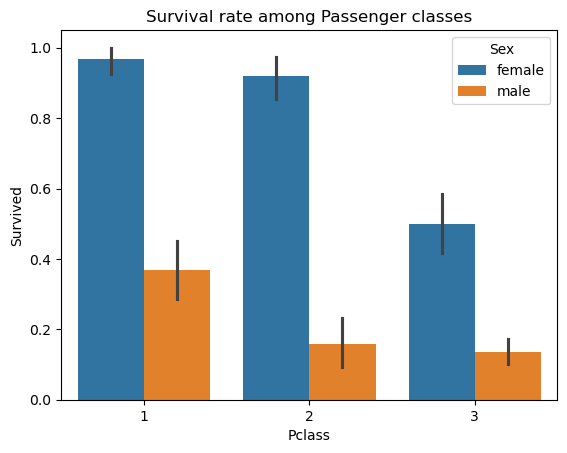

In [ ]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=df)
plt.title("Survival rate among Passenger classes")
plt.show()

In [57]:
# Feature engineering
df['IsChild'] = df['Age'] < 18

Text(0.5, 1.0, 'Corrleation Heatmap')

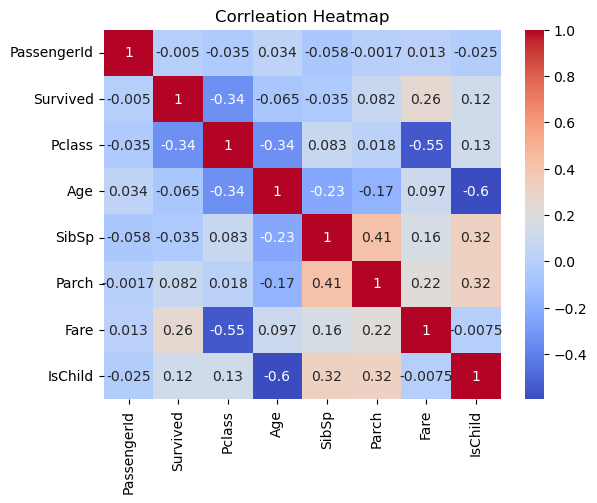

In [63]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title('Corrleation Heatmap')

In [64]:
query3 = """
SELECT Pclass, Sex, COUNT(*) AS Count, AVG(Survived) AS Survival_Rate
FROM titanic
GROUP BY Pclass, Sex
ORDER BY Pclass, Sex;"""

pd.read_sql_query(query3, conn)

,Pclass,Sex,Count,Survival_Rate
0,1,female,94,0.968085
1,1,male,122,0.368852
2,2,female,76,0.921053
3,2,male,108,0.157407
4,3,female,144,0.500000
5,3,male,347,0.135447


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [67]:
X = pd.get_dummies(df[['Pclass', 'Sex', 'Age']], drop_first=True)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [72]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, preds))

Accuracy: 0.8097014925373134
